# Data Cleansing of the Ames Housing Data

Ames, Iowa is the college town of **Iowa State University**. The Ames housing dataset consists of about $2500$ house sale records between $2006-2010$. Detailed information about the house attributes, along with the sale prices, is recorded in the dataset.

A subset of the **Ames** dataset is hosted on [**Kaggle**](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) as an entry-level regression competition. You may visit their site for some information on the meanings of its data columns (the data dictionary).

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## Table of Contents
* [1.1 Environment Setup](#env-setup)
    * [Import Modules](#imports)
    * [Display Settings](#display)
    * [Load House Price Data](#readcsv)
<br><br>
* [1.2 Data Cleaning](#eda)
    * [1.2.1 Remove Duplicate Rows](#dup-rows)
    * [1.2.2 Remove Irrelevant Features](#irrelevant)
    * [1.2.3 List of Variables with Missing Values](#listnan)    
    * [1.2.4 Impute Missing LotFrontage Values](#lotfrontage)
    * [1.2.5 Impute Missing Basement related Values](#basement)
    * [1.2.6 Impute Missing GarageArea and GarageCars Values](#garage)
    * [1.2.7 Impute Missing Electrical Values](#electrical)
    * [1.2.8 Impute Missing MasVnrType and MasVnrArea Values](#vnr)
    * [1.2.9 Data Consistency: BsmtExposure (Basement Exposure)](#bsmtexposure)
    * [1.2.10 Data Consistency: Garage related variables](#garconsistency)
    * [1.2.11 Data Consistency: YearRemodAdd](#yraconsistency)
<br><br>
* [1.3 Write cleaned dataset to csv file](#writecsv)

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 1.1 Environment Setup<a class="anchor" id="env-setup"></a>

#### 1.1.1 Import Modules<a class="anchor" id="imports"></a>

In [2]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import KNNImputer
import math

#### 1.1.2 Display Settings<a class="anchor" id="display"></a>

In [3]:
pd.set_option('display.max_columns', None) # display all the columns of a dataframe
pd.set_option('display.max_rows', 100)     # display 100 rows of a dataframe

#### 1.1.3 Load House Price Data<a class="anchor" id="readcsv"></a>

In [4]:
# load the housing price data
dataset = pd.read_csv('../data/Ames_Housing_Price_Data.csv', index_col=0)

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 1.2 Eploratory Data Analysis<a class="anchor" id="eda"></a>

#### 1.2.1 Remove Duplicate Rows<a class="anchor" id="dup-rows"></a>

In [5]:
dataset[dataset.duplicated()]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909276070,1717,194000,50,RL,80.0,12400,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1940,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Mn,BLQ,602.0,Unf,0.0,299.0,901.0,GasA,TA,Y,SBrkr,1125,592,0,0.0,0.0,1,1,2,1,TA,7,Typ,1,Gd,Attchd,1940.0,Unf,1.0,410.0,TA,TA,Y,0,0,0,0,113,0,NaN,NaN,NaN,0,2,2006,WD,Normal


In [6]:
dataset.drop_duplicates(inplace=True) # duplicate row removed

In [7]:
# Reset index (since one row was removed and the original index in the file does not have unique values)
dataset.reset_index(drop=True, inplace=True)

#### 1.2.2 Remove Irrelevant observations<a class="anchor" id="irrelevant"></a>

In [8]:
# PID removed since it is just an identifier for each row
dataset.drop('PID',axis=1, inplace=True)

#### 1.2.3 List of Variables with Missing Values<a class="anchor" id="listnan"></a>

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

#### 1.2.4 Impute Missing LotFrontage Values<a class="anchor" id="lotfrontage"></a>

In [9]:
# Use Knn Imputation for Missing Values
# Variable = LotFrontage
imputer = KNNImputer(n_neighbors=round(math.sqrt(len(dataset)))) # k -> square root of the number of observations
imputed = imputer.fit_transform(dataset.select_dtypes(include='number')) # calculate values with limited columns
dataset_imputed = pd.DataFrame(imputed, columns=dataset.select_dtypes(include='number').columns) # impute dataset

In [10]:
dataset_imputed['LotFrontage'] = round(dataset_imputed['LotFrontage']) # round values to match existing values

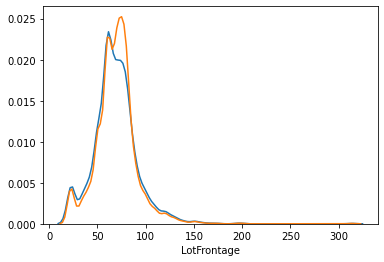

In [11]:
# confirm the distribution of 'LotFrontage' did not change significantly
sns.distplot(dataset['LotFrontage'], hist=False)
sns.distplot(dataset_imputed['LotFrontage'], hist=False)

In [12]:
# Add imputed values to original dataset
dataset['LotFrontage'] = dataset_imputed['LotFrontage']

#### 1.2.5 Impute Missing Basement related Values<a class="anchor" id="basement"></a>

In [13]:
# After researching all the Bsm columns, concluded it was best
# to replace NaN values with zeros in the following columns
dataset['TotalBsmtSF'].fillna(0, inplace=True)
dataset['BsmtHalfBath'].fillna(0, inplace=True)
dataset['BsmtFullBath'].fillna(0, inplace=True)
dataset['BsmtFinSF1'].fillna(0, inplace=True)
dataset['BsmtFinSF2'].fillna(0, inplace=True)
dataset['BsmtUnfSF'].fillna(0, inplace=True)

#### 1.2.6 Impute Missing GarageArea and GarageCars Values<a class="anchor" id="garage"></a>

In [14]:
# GarageArea and GarageCars missing values (1 entry). 
dataset[dataset['GarageArea'].isna()].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# filling na with zero
dataset['GarageArea'].fillna(0, inplace=True)
dataset['GarageCars'].fillna(0, inplace=True)

#### 1.2.7 Impute Missing Electrical Values<a class="anchor" id="electrical"></a>

In [16]:
# Electrical -> Replacing missing na with SBrkr (every other house built on 
# same year has Standard Circuit Breakers & Romex (SBrkr))
dataset['Electrical'].fillna("SBrkr", inplace=True)

#### 1.2.8 Impute Missing MasVnrType and MasVnrArea Values<a class="anchor" id="vnr"></a>

In [17]:
# replacing NAs in MasVnrType with None and MasVnrArea with zero
dataset['MasVnrArea'].fillna(0, inplace=True)
dataset['MasVnrType'].fillna("None", inplace=True)

#### 1.2.9 Data Consistency: BsmtExposure (Basement Exposure)<a class="anchor" id="bsmtexposure"></a>

In [18]:
# BsmtExposure is set to not basement by mistake.It should be set to No Exposure ("No")
dataset[(dataset['BsmtExposure'].isna()) & (dataset['BsmtQual'].notnull())].filter(like="Bsm")


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
813,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
1201,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0


In [19]:
# We will impute the values manually to No Exposure("No")
dataset.loc[[813,1201],'BsmtExposure']="No"

In [20]:
# BsmtFinType2 is set to no basement by mistake.
dataset[(dataset['BsmtFinType2'].isna()) & (dataset['BsmtQual'].notnull())].filter(like="Bsm")

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
2433,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [21]:
# Replacing NaN with Unf = unfinished (it is only one entry)
dataset.loc[2433,'BsmtFinType2']="Unf"

#### 1.2.10 Data Consistency: Garage related variables<a class="anchor" id="garconsistency"></a>

In [22]:
# GarageType is incorrect, there is no garage.
dataset[(dataset['GarageType']=='Detchd') & (dataset['GarageArea']==0)].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,Detchd,NaN,NaN,0.0,0.0,NaN,NaN


In [23]:
# since there is no garage, the GarageType for 433 was set to NaN
dataset.loc[433,'GarageType']="None"

In [24]:
# GarageYrBlt, GarageFinish, GarageQual, and GarageCond are NaN, but there is a Garage
dataset[(dataset['GarageType'].notnull()) & (dataset['GarageFinish'].isna())].filter(like="Ga")

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
433,None,NaN,NaN,0.0,0.0,NaN,NaN
531,Detchd,NaN,NaN,1.0,360.0,NaN,NaN


In [25]:
# Adding values to one observation with Detached garage
dataset.loc[531,'GarageYrBlt'] = 1910        # Year house was built
dataset.loc[531,'GarageFinish'] = "Unf"
dataset.loc[531,'GarageQual'] = "TA"
dataset.loc[531,'GarageCond'] = "TA"

In [26]:
# converting "NA" to zero in the GarageYrBlt column
dataset['GarageYrBlt'].fillna(0, inplace=True)
# filling all NaNs with "NA" (string) (except GarageYrBlt) ---> No garage, No basement, No pool, etc...
dataset.fillna("None", inplace=True)

In [27]:
# Garage built before the house ?
dataset[(dataset['YearBuilt']>dataset['GarageYrBlt']) & (dataset['GarageArea']>0)][['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold','GarageArea','GarageType']]

,YearBuilt,GarageYrBlt,YearRemodAdd,YrSold,GarageArea,GarageType
33,1923,1922.0,2000,2008,370.0,Detchd
238,1930,1925.0,1950,2008,160.0,Detchd
254,1910,1900.0,1998,2007,506.0,Detchd
615,2006,2005.0,2007,2007,1110.0,Attchd
689,1927,1920.0,1950,2008,240.0,Detchd
701,2005,2003.0,2005,2006,736.0,BuiltIn
738,1959,1954.0,1959,2006,539.0,BuiltIn
905,1945,1925.0,1995,2008,164.0,Attchd
941,2006,2005.0,2006,2007,674.0,Attchd
945,1963,1962.0,1963,2008,336.0,Detchd


In [28]:
# Updated GarageYrBlt with YearBuilt when the GarageYrBlt is before the house YearBuilt
new_years = pd.DataFrame(dataset[(dataset['YearBuilt']>dataset['GarageYrBlt']) & (dataset['GarageArea']>0)]['YearBuilt'])
new_years.columns = ['GarageYrBlt']
dataset.update(new_years)

#### 1.2.11 Data Consistency: YearRemodAdd<a class="anchor" id="yraconsistency"></a>

In [29]:
# Houses updated (YearRemodAdd) before the house construction date
dataset[dataset['YearBuilt']>dataset['YearRemodAdd']][['YearBuilt','GarageYrBlt','YearRemodAdd','YrSold']]

,YearBuilt,GarageYrBlt,YearRemodAdd,YrSold
2033,2002,2002.0,2001,2009


In [30]:
# udpate
dataset.loc[2034,'YearRemodAdd']=2002

<br><br>
<hr style="height:1px;border:none;color:#333;background-color:#333;" />

## 1.3 Write cleaned dataset to csv file<a class="anchor" id="writecsv"></a>

In [32]:
# Write cleaned dataset to csv file
dataset.to_csv('../ariel/Price_Data_cleaned.csv', index=False)